In [86]:
# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

In [87]:
# Загрузка данных
data = pd.read_csv('data/Housing.csv')

# Шаг 1: Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
print("Shillo S.O. IKBO-25-21")

Shillo S.O. IKBO-25-21


C:\Users\ursus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\ursus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\ursus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\ursus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

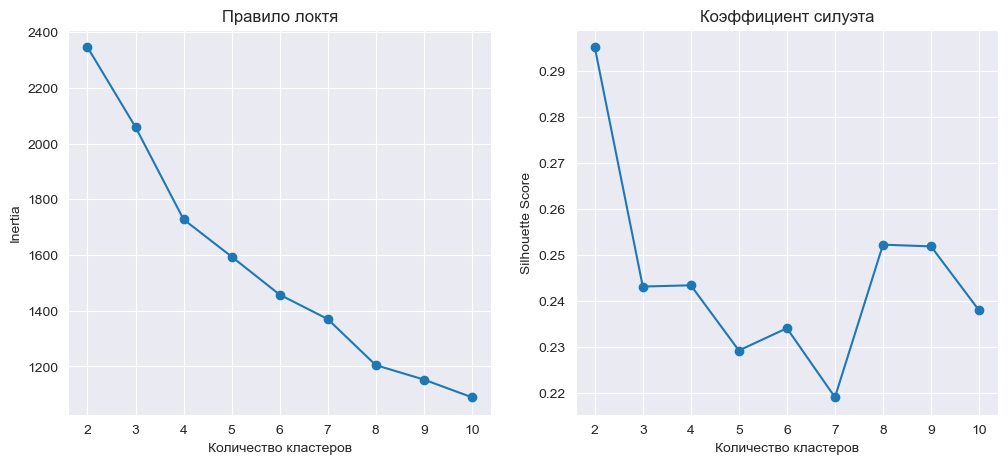

Оптимальное количество кластеров: 2
Shillo S.O. IKBO-25-21


C:\Users\ursus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [88]:
# Шаг 2: K-means кластеризация
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Построение графиков для выбора количества кластеров
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Правило локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Коэффициент силуэта")
plt.xlabel("Количество кластеров")
plt.ylabel("Silhouette Score")
plt.show()

# Оптимальное k
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальное количество кластеров: {optimal_k}")

# Финальная модель K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
print("Shillo S.O. IKBO-25-21")

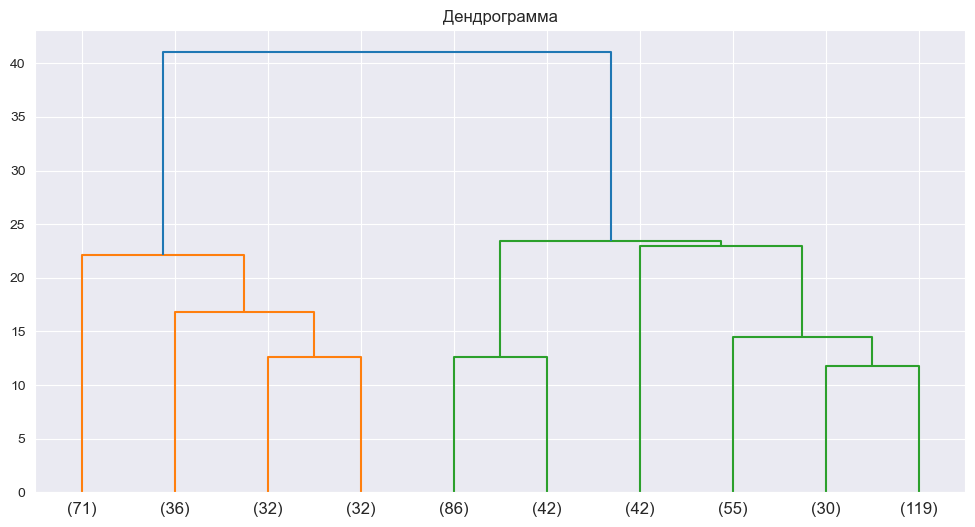

Shillo S.O. IKBO-25-21


In [93]:
# Шаг 3: Иерархическая кластеризация
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp',p=10)
plt.title("Дендрограмма")
plt.show()
print("Shillo S.O. IKBO-25-21")

In [90]:
# Шаг 4: DBSCAN кластеризация
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
print(f"Количество кластеров DBSCAN (включая шумовые): {len(set(dbscan_labels))}")
print("Shillo S.O. IKBO-25-21")

Количество кластеров DBSCAN (включая шумовые): 19
Shillo S.O. IKBO-25-21


In [91]:
import plotly.graph_objects as go

tsne_3d = TSNE(n_components=3, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(data_scaled)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=tsne_results_3d[:, 0],
            y=tsne_results_3d[:, 1],
            z=tsne_results_3d[:, 2],
            mode='markers',
            marker=dict(
                size=4,
                color=dbscan_labels,
                colorscale='Viridis',
                colorbar=dict(
                    tickvals=list(set(dbscan_labels)),
                    title="Кластеры"
                ),
            )
        )
    ]
)
fig.show()
print("Shillo S.O. IKBO-25-21")

Shillo S.O. IKBO-25-21
